<a href="https://colab.research.google.com/github/AnkithR10/BigMart-Sales-Prediction/blob/main/BigMartSalesPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import the libraries
#for mathematical computation
import numpy as np
import pandas as pd
import scipy.stats as stats
#for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly

import plotly.express as px
from matplotlib.pyplot import figure
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objects as go
%matplotlib inline

In [ ]:
#load data
df = pd.read_csv('/content/Train-Set.csv')

In [ ]:
df.head()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df.tail()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [ ]:
df.info

<bound method DataFrame.info of      ProductID  Weight FatContent  ProductVisibility            ProductType  \
0        FDA15   9.300    Low Fat           0.016047                  Dairy   
1        DRC01   5.920    Regular           0.019278            Soft Drinks   
2        FDN15  17.500    Low Fat           0.016760                   Meat   
3        FDX07  19.200    Regular           0.000000  Fruits and Vegetables   
4        NCD19   8.930    Low Fat           0.000000              Household   
...        ...     ...        ...                ...                    ...   
8518     FDF22   6.865    Low Fat           0.056783            Snack Foods   
8519     FDS36   8.380    Regular           0.046982           Baking Goods   
8520     NCJ29  10.600    Low Fat           0.035186     Health and Hygiene   
8521     FDN46   7.210    Regular           0.145221            Snack Foods   
8522     DRG01  14.800    Low Fat           0.044878            Soft Drinks   

           MRP Outl

In [ ]:
df.shape

(8523, 12)

In [ ]:
df.isnull().sum()

ProductID               0
Weight               1463
FatContent              0
ProductVisibility       0
ProductType             0
MRP                     0
OutletID                0
EstablishmentYear       0
OutletSize           2410
LocationType            0
OutletType              0
OutletSales             0
dtype: int64

**Filling missing Values**

In [ ]:
df['Weight'].mean()

12.857645184135976

In [ ]:
df['OutletSize'].mode()

0    Medium
Name: OutletSize, dtype: object

In [ ]:
df['Weight'].fillna(df['Weight'].mean(),inplace=True)

In [ ]:
ModeOfOutletSize= df.pivot_table(values='OutletSize',columns='OutletType',aggfunc=(lambda x: x.mode()[0]))

In [ ]:
missing_values= df['OutletSize'].isnull()

In [ ]:
print(ModeOfOutletSize)

OutletType Grocery Store Supermarket Type1 Supermarket Type2 Supermarket Type3
OutletSize         Small             Small            Medium            Medium


In [ ]:
print(missing_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: OutletSize, Length: 8523, dtype: bool


In [ ]:
#Filling missing values of 'Outletsize' with mode
Mode_Of_Outlet_Size= df.pivot_table(values='OutletSize',columns='OutletType',aggfunc=(lambda x: x.mode()[0]))

In [ ]:
df.isnull().sum()

ProductID               0
Weight                  0
FatContent              0
ProductVisibility       0
ProductType             0
MRP                     0
OutletID                0
EstablishmentYear       0
OutletSize           2410
LocationType            0
OutletType              0
OutletSales             0
dtype: int64

In [ ]:
df.describe()

,Weight,ProductVisibility,MRP,EstablishmentYear,OutletSales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


**Data Visualisation**

In [ ]:
sns.set()

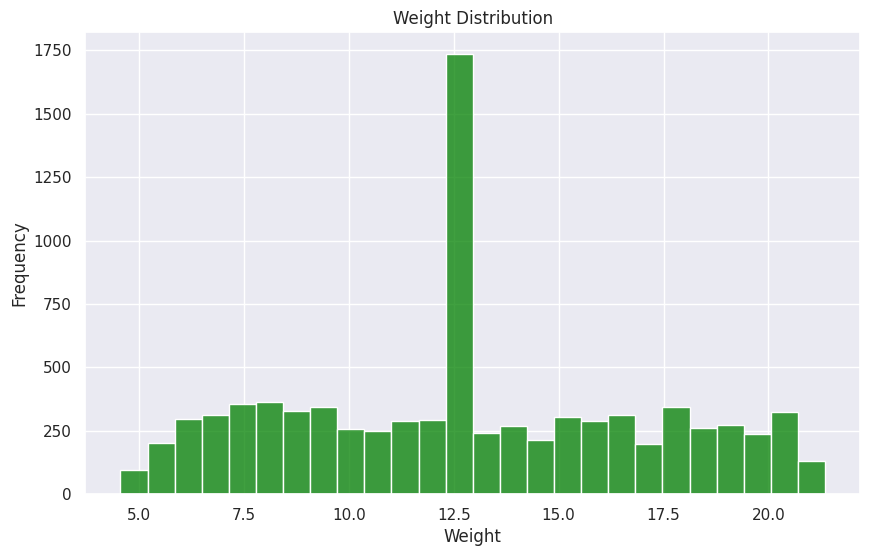

In [ ]:
# Weight distribution with custom color
plt.figure(figsize=(10, 6))
sns.histplot(df['Weight'], color='green')  # Change color to 'green' or any other color
plt.title('Weight Distribution')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.show()


Hence from the above graph we can observe that we have the item weight from 5 Kg to 20 Kg & we have maximum values around 12 Kg where the mean is 12.85 Kg

Therefore in this 8523 products the average weight is about 12.8 Kg.

<Figure size 800x800 with 0 Axes>

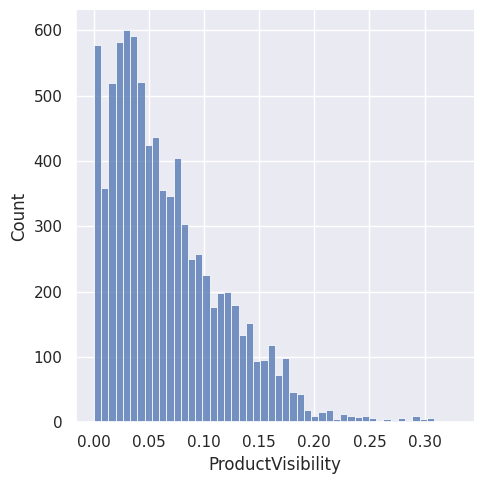

In [ ]:
#Item Visibility Distribution
plt.figure(figsize=(8,8))
sns.displot(df['ProductVisibility'])
plt.show()

**Hence from the above graph we can observe that Item_Visibility feature is positively skewed**

<Figure size 700x700 with 0 Axes>

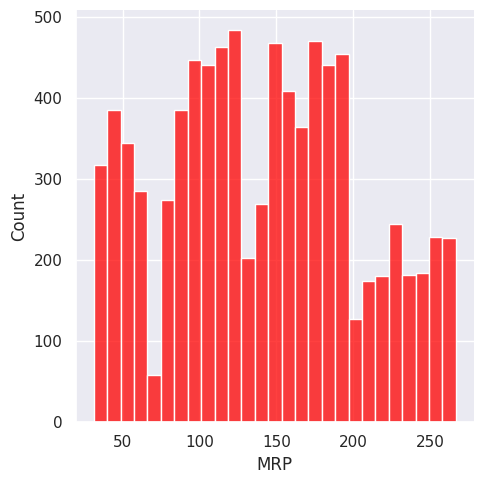

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#Item MRP distribution
plt.figure(figsize=(7, 7))
sns.displot(df['MRP'],color= 'red')
plt.show()

From the above graph, we can observe that we have good amount of products for 50 MRP, 100 MRP ,200 MRP & then we have less products

Hence we have more products in the range of 100 MRP - 180 MRP

<Figure size 700x700 with 0 Axes>

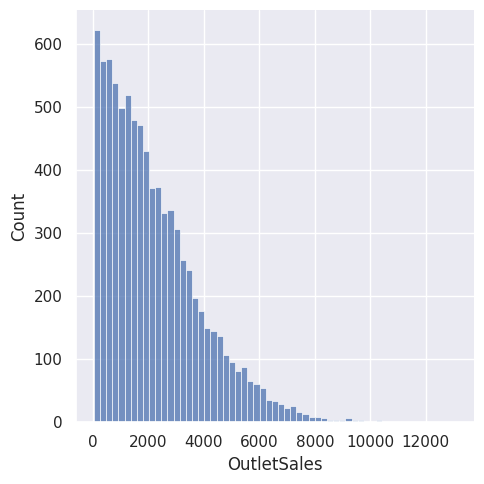

In [ ]:
#Item Outlet distribution
plt.figure(figsize=(7,7))
sns.displot(df['OutletSales'])
plt.show()

**Hence from the above graph we can observe that Item_Outlet_Sales feature is positively skewed**

<ipython-input-23-2a9f1636ce94>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-23-2a9f1636ce94>:9: UserWarning:

The palette list has more values (10) than needed (9), which may not be intended.



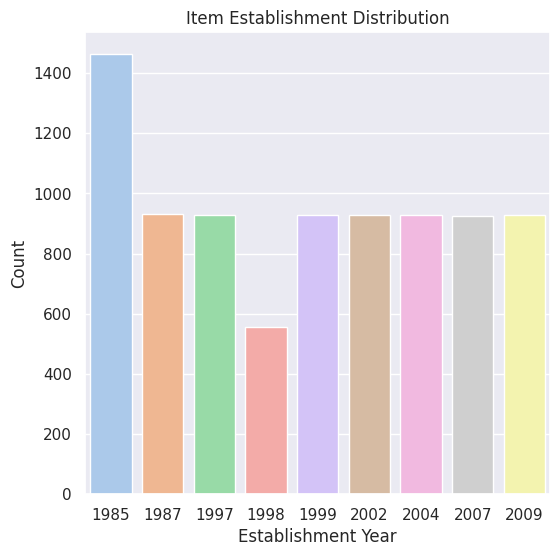

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a custom color palette
custom_palette = sns.color_palette('pastel')

# Item establishment distribution with custom color palette
plt.figure(figsize=(6, 6))
sns.countplot(x="EstablishmentYear", data=df, palette=custom_palette)
plt.title('Item Establishment Distribution')
plt.xlabel('Establishment Year')
plt.ylabel('Count')
plt.show()


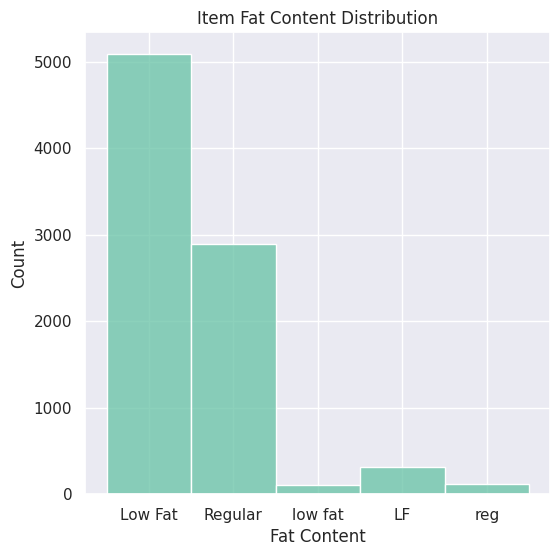

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a custom color palette
custom_palette = sns.color_palette('Set2')

# Item fat column distribution with custom color palette
plt.figure(figsize=(6,6))
sns.histplot(df['FatContent'], color=custom_palette[0])  # Using the first color in the custom palette
plt.title('Item Fat Content Distribution')
plt.xlabel('Fat Content')
plt.ylabel('Count')
plt.show()


<ipython-input-34-990833c2fa27>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-34-990833c2fa27>:12: UserWarning:


The palette list has fewer values (10) than needed (16) and will cycle, which may produce an uninterpretable plot.



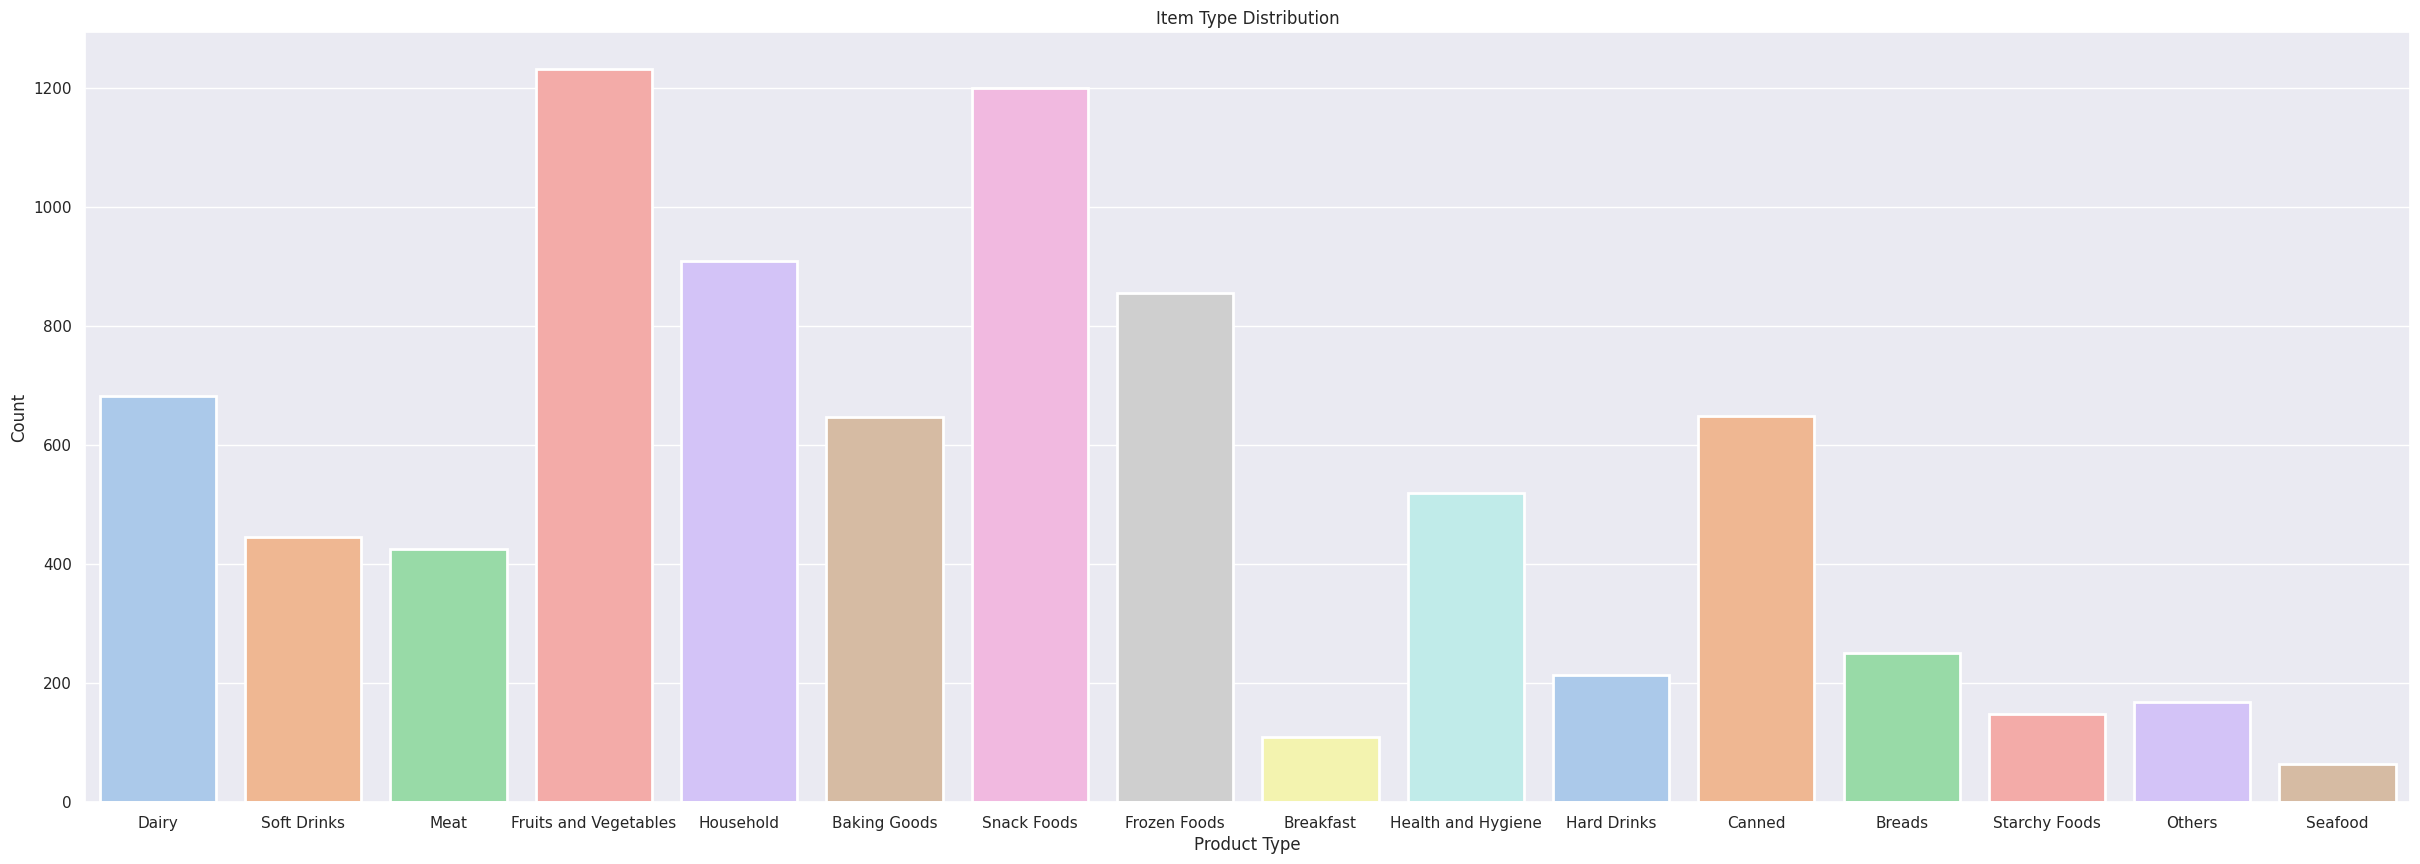

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a custom color palette
custom_palette = sns.color_palette('pastel')

# Drop rows with missing 'ProductType' values
df = df.dropna(subset=['ProductType'])

# Item type distribution with custom color palette
plt.figure(figsize=(30, 10))  # Increase the figure width to accommodate wider bars
sns.countplot(x='ProductType', data=df, palette=custom_palette, linewidth=2)  # Remove the 'rot' argument
plt.title('Item Type Distribution')
plt.xlabel('Product Type')
plt.ylabel('Count')
plt.show()

<ipython-input-39-8061a99e81be>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-39-8061a99e81be>:9: UserWarning:

The palette list has more values (4) than needed (3), which may not be intended.



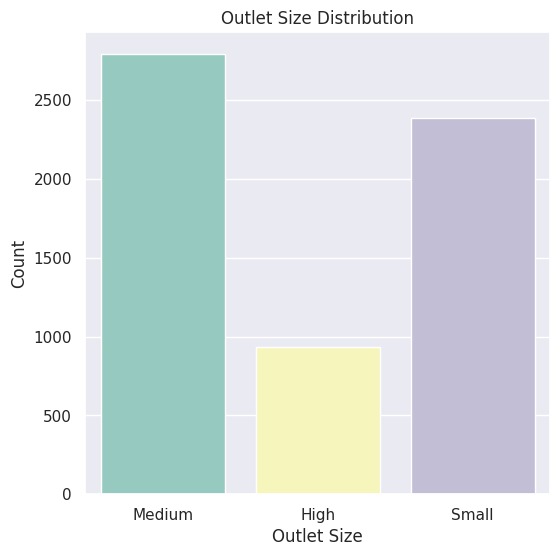

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a custom color palette
custom_palette = sns.color_palette('Set3', n_colors=len(df['OutletSize'].unique()))

# Outlet size distribution
plt.figure(figsize=(6, 6))
sns.countplot(x='OutletSize', data=df, hue=None, palette=custom_palette, legend=False)
plt.title('Outlet Size Distribution')
plt.xlabel('Outlet Size')
plt.ylabel('Count')
plt.show()

**Data Pre-Processing**

In [ ]:
df.head(10)

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930000,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395000,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [ ]:
df['FatContent'].value_counts

<bound method IndexOpsMixin.value_counts of 0       Low Fat
1       Regular
2       Low Fat
3       Regular
4       Low Fat
         ...   
8518    Low Fat
8519    Regular
8520    Low Fat
8521    Regular
8522    Low Fat
Name: FatContent, Length: 8523, dtype: object>

In [ ]:
df.replace({'Fatcontent':{'low fat':'Low Fat', 'LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [ ]:
df['FatContent'].value_counts

<bound method IndexOpsMixin.value_counts of 0       Low Fat
1       Regular
2       Low Fat
3       Regular
4       Low Fat
         ...   
8518    Low Fat
8519    Regular
8520    Low Fat
8521    Regular
8522    Low Fat
Name: FatContent, Length: 8523, dtype: object>